## Vizualizing Page Views Data across time
#### These analyses were done for the erd project of the Data Analysis with Python Certification series on FreeCodeCamp

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Read and clean the data
Remove the data in top and bottom 2.5%

In [2]:
df=pd.read_csv('./data/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [3]:
df=df[(df['value'] >=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### Plot the number of visits across dates

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views')]

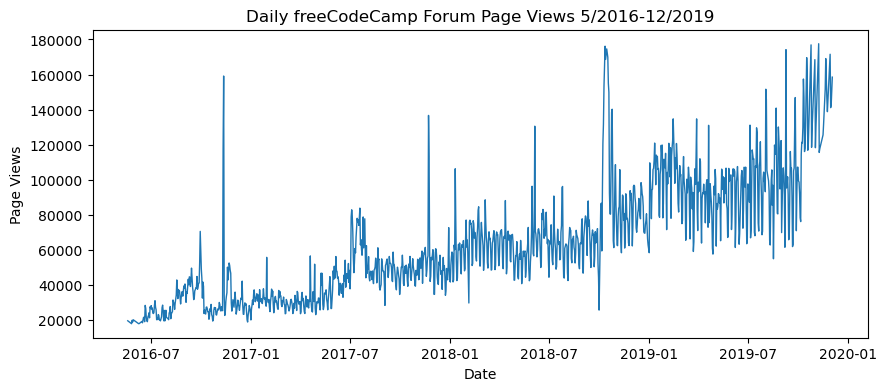

In [4]:

fig = plt.figure(figsize=(10,4))
sns.lineplot(x='date', y='value', data=df, linewidth=1).set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')


#### Plot number of page view aggregated by year

In [5]:
df['day'] = df.index.day
df['month'] = df.index.month_name()
df['year'] = df.index.year
df.head()

,value,day,month,year
date,,,,
2016-05-19,19736,19,May,2016
2016-05-26,18060,26,May,2016
2016-05-27,19997,27,May,2016
2016-05-28,19044,28,May,2016
2016-05-29,20325,29,May,2016


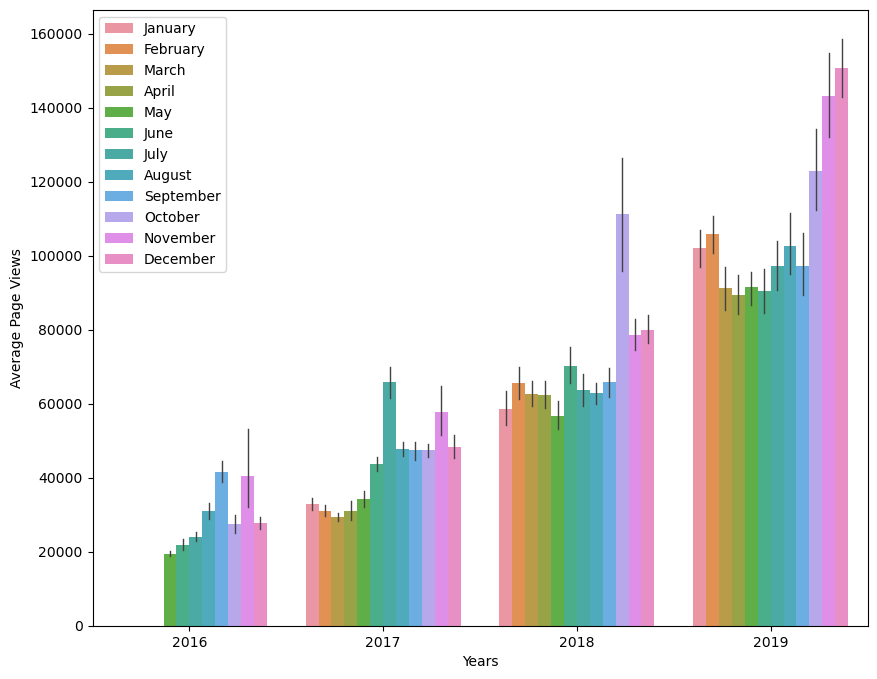

In [6]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='year', y='value', hue='month', data=df, errwidth=1, hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).set(ylabel='Average Page Views', xlabel='Years')
plt.legend(loc='upper left')


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

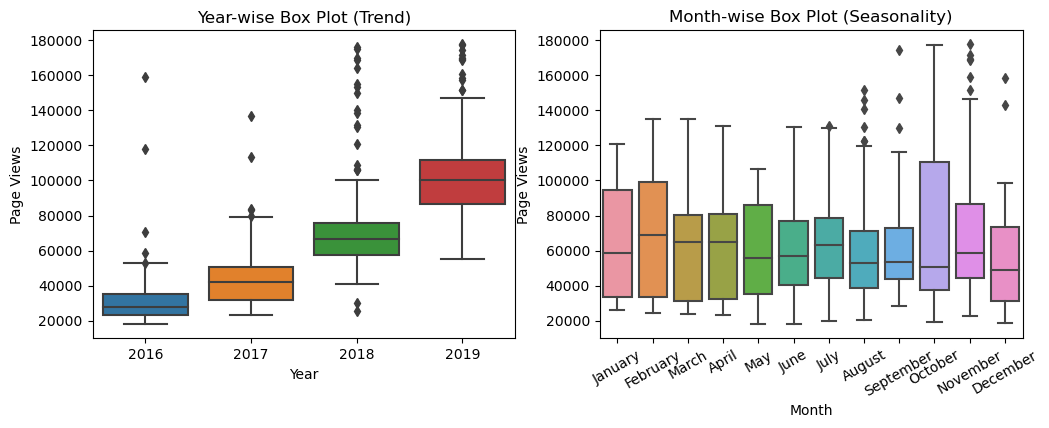

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=df, x='year', y='value', ax=ax1).set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
sns.boxplot(data=df, x='month', y='value', ax=ax2, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
